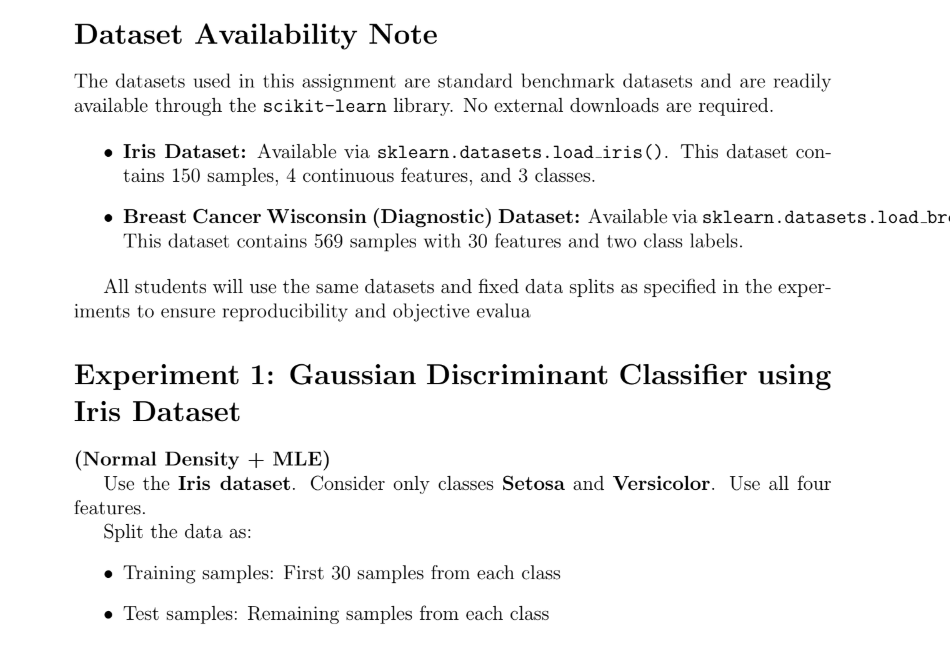

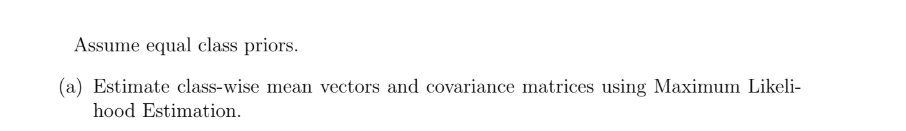

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


# load data
iris = load_iris()
X = iris.data        # (150, 4)
y = iris.target     # labels: 0,1,2


# Select Setosa and Versicolor only
X_setosa = X[0:50]
X_versicolor = X[50:100]

y_setosa = y[0:50]
y_versicolor = y[50:100]

# Training: first 30 samples from each class
X_train = np.vstack((X_setosa[:30], X_versicolor[:30]))
y_train = np.hstack((y_setosa[:30], y_versicolor[:30]))

# Testing: remaining samples
X_test = np.vstack((X_setosa[30:], X_versicolor[30:]))
y_test = np.hstack((y_setosa[30:], y_versicolor[30:]))

print("Training shape:", X_train.shape)
print("Testing shape :", X_test.shape)


Training shape: (60, 4)
Testing shape : (40, 4)


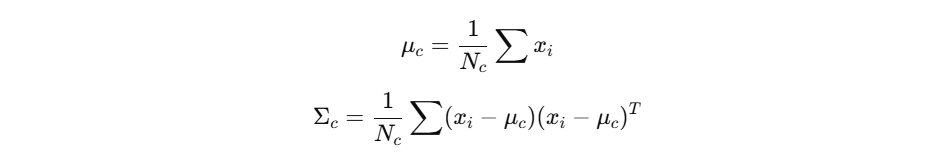

In [3]:
def mle_mean_cov(X):
    mu = np.mean(X, axis=0)
    Sigma = np.zeros((X.shape[1], X.shape[1]))
    for x in X:
        d = (x - mu).reshape(-1, 1)
        Sigma += d @ d.T
    Sigma /= X.shape[0]
    return mu, Sigma

# Separate by class
X0 = X_train[y_train == 0]
X1 = X_train[y_train == 1]

mu0, Sigma0 = mle_mean_cov(X0)
mu1, Sigma1 = mle_mean_cov(X1)

print("Mean (Setosa):\n", mu0)
print("\nMean (Versicolor):\n", mu1)


Mean (Setosa):
 [5.02666667 3.45       1.47333333 0.24666667]

Mean (Versicolor):
 [6.07       2.79       4.33333333 1.35333333]


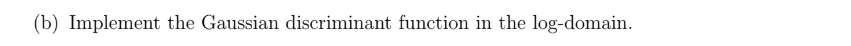

In [5]:
def gaussian_discriminant(x, mu, Sigma, prior=0.5):
    invS = np.linalg.inv(Sigma)
    detS = np.linalg.det(Sigma)
    diff = (x - mu).reshape(-1, 1)
    g = -0.5 * diff.T @ invS @ diff
    g += -0.5 * np.log(detS)
    g += np.log(prior)
    return g.item()


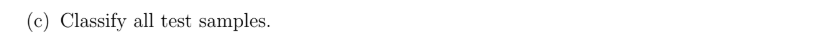

In [7]:
y_pred = []

for x in X_test:
    g0 = gaussian_discriminant(x, mu0, Sigma0)
    g1 = gaussian_discriminant(x, mu1, Sigma1)
    y_pred.append(0 if g0 > g1 else 1)

y_pred = np.array(y_pred)


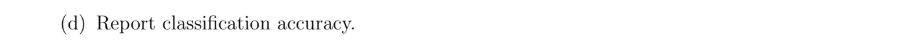

In [8]:
accuracy = np.mean(y_pred == y_test)
print(f"Classification Accuracy = {accuracy*100:.2f}%")


Classification Accuracy = 100.00%


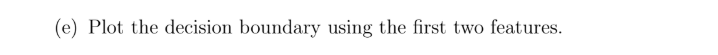

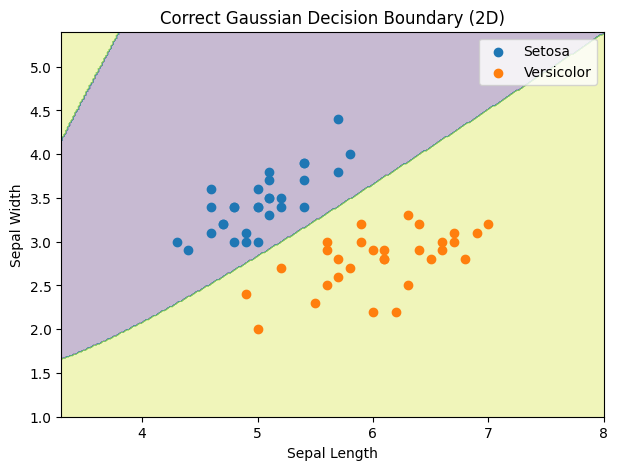

In [10]:
# exact only two features

X2_train = X_train[:, :2]
X2_test  = X_test[:, :2]

X2_0 = X2_train[y_train == 0]
X2_1 = X2_train[y_train == 1]

#recomputing MLE

mu0_2, Sigma0_2 = mle_mean_cov(X2_0)
mu1_2, Sigma1_2 = mle_mean_cov(X2_1)

#2D Gaussian discrement

def gaussian_discriminant_2d(x, mu, Sigma, prior=0.5):
    invS = np.linalg.inv(Sigma)
    detS = np.linalg.det(Sigma)
    diff = (x - mu).reshape(-1, 1)
    return (-0.5 * diff.T @ invS @ diff
            -0.5 * np.log(detS)
            + np.log(prior)).item()


# decision boundary mesh

x_min, x_max = X2_train[:,0].min()-1, X2_train[:,0].max()+1
y_min, y_max = X2_train[:,1].min()-1, X2_train[:,1].max()+1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

Z = np.zeros(xx.shape)

for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        x = np.array([xx[i,j], yy[i,j]])
        g0 = gaussian_discriminant_2d(x, mu0_2, Sigma0_2)
        g1 = gaussian_discriminant_2d(x, mu1_2, Sigma1_2)
        Z[i,j] = 0 if g0 > g1 else 1


# plot boundary

plt.figure(figsize=(7,5))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X2_0[:,0], X2_0[:,1], label="Setosa")
plt.scatter(X2_1[:,0], X2_1[:,1], label="Versicolor")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
plt.title("Correct Gaussian Decision Boundary (2D)")
plt.show()



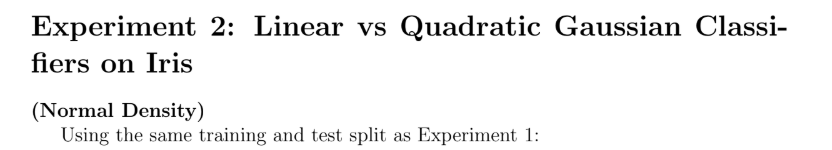

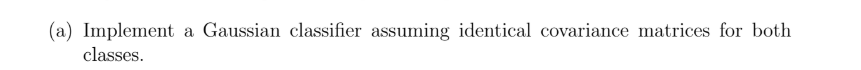

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


iris = load_iris()
X = iris.data
y = iris.target

# Only Setosa (0) and Versicolor (1)
X_setosa = X[0:50]
X_versicolor = X[50:100]

y_setosa = y[0:50]
y_versicolor = y[50:100]

# Training
X_train = np.vstack((X_setosa[:30], X_versicolor[:30]))
y_train = np.hstack((y_setosa[:30], y_versicolor[:30]))

# Testing
X_test = np.vstack((X_setosa[30:], X_versicolor[30:]))
y_test = np.hstack((y_setosa[30:], y_versicolor[30:]))

print(X_train.shape, X_test.shape)


#MLE mean and variance

def mle_mean_cov(X):
    mu = np.mean(X, axis=0)
    Sigma = np.zeros((X.shape[1], X.shape[1]))
    for x in X:
        d = (x - mu).reshape(-1, 1)
        Sigma += d @ d.T
    Sigma /= X.shape[0]
    return mu, Sigma

X0 = X_train[y_train == 0]
X1 = X_train[y_train == 1]

mu0, Sigma0 = mle_mean_cov(X0)
mu1, Sigma1 = mle_mean_cov(X1)


#LDA
# Pooled covariance
N0 = X0.shape[0]
N1 = X1.shape[0]

Sigma_pooled = (N0*Sigma0 + N1*Sigma1) / (N0 + N1)

def lda_discriminant(x, mu, Sigma, prior=0.5):
    invS = np.linalg.inv(Sigma)
    return (x @ invS @ mu
            - 0.5 * mu @ invS @ mu
            + np.log(prior))


y_pred_lda = []

for x in X_test:
    g0 = lda_discriminant(x, mu0, Sigma_pooled)
    g1 = lda_discriminant(x, mu1, Sigma_pooled)
    y_pred_lda.append(0 if g0 > g1 else 1)

y_pred_lda = np.array(y_pred_lda)

acc_lda = np.mean(y_pred_lda == y_test)
print(f"LDA Accuracy = {acc_lda*100:.2f}%")


(60, 4) (40, 4)
LDA Accuracy = 100.00%


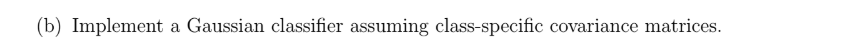

In [13]:
import numpy as np
from sklearn.datasets import load_iris

# -----------------------------
# Load dataset
# -----------------------------
iris = load_iris()
X = iris.data
y = iris.target

# -----------------------------
# Exact split (Setosa & Versicolor only)
# -----------------------------
X_setosa = X[0:50]
X_versicolor = X[50:100]

y_setosa = y[0:50]
y_versicolor = y[50:100]

# Training: first 30 from each class
X_train = np.vstack((X_setosa[:30], X_versicolor[:30]))
y_train = np.hstack((y_setosa[:30], y_versicolor[:30]))

# Testing: remaining samples
X_test = np.vstack((X_setosa[30:], X_versicolor[30:]))
y_test = np.hstack((y_setosa[30:], y_versicolor[30:]))

print("Training shape:", X_train.shape)
print("Testing shape :", X_test.shape)

# -----------------------------
# MLE estimation
# -----------------------------
def mle_mean_cov(X):
    mu = np.mean(X, axis=0)
    Sigma = np.zeros((X.shape[1], X.shape[1]))
    for x in X:
        d = (x - mu).reshape(-1, 1)
        Sigma += d @ d.T
    Sigma /= X.shape[0]
    return mu, Sigma

X0 = X_train[y_train == 0]  # Setosa
X1 = X_train[y_train == 1]  # Versicolor

mu0, Sigma0 = mle_mean_cov(X0)
mu1, Sigma1 = mle_mean_cov(X1)

# -----------------------------
# Quadratic Gaussian Discriminant (QDA)
# -----------------------------
def qda_discriminant(x, mu, Sigma, prior=0.5):
    invS = np.linalg.inv(Sigma)
    detS = np.linalg.det(Sigma)
    d = (x - mu).reshape(-1, 1)
    return (-0.5 * d.T @ invS @ d
            -0.5 * np.log(detS)
            + np.log(prior)).item()

# -----------------------------
# Classification
# -----------------------------
y_pred = []
for x in X_test:
    g0 = qda_discriminant(x, mu0, Sigma0)
    g1 = qda_discriminant(x, mu1, Sigma1)
    y_pred.append(0 if g0 > g1 else 1)

y_pred = np.array(y_pred)

# -----------------------------
# Accuracy
# -----------------------------
accuracy = np.mean(y_pred == y_test)
print(f"QDA Classification Accuracy = {accuracy*100:.2f}%")


Training shape: (60, 4)
Testing shape : (40, 4)
QDA Classification Accuracy = 100.00%


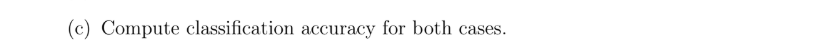

In [14]:
import numpy as np
from sklearn.datasets import load_iris

# -----------------------------
# Load dataset and split (same as Experiment 1)
# -----------------------------
iris = load_iris()
X = iris.data
y = iris.target

X_setosa = X[0:50]
X_versicolor = X[50:100]

y_setosa = y[0:50]
y_versicolor = y[50:100]

X_train = np.vstack((X_setosa[:30], X_versicolor[:30]))
y_train = np.hstack((y_setosa[:30], y_versicolor[:30]))

X_test = np.vstack((X_setosa[30:], X_versicolor[30:]))
y_test = np.hstack((y_setosa[30:], y_versicolor[30:]))

# -----------------------------
# MLE mean and covariance
# -----------------------------
def mle_mean_cov(X):
    mu = np.mean(X, axis=0)
    Sigma = np.zeros((X.shape[1], X.shape[1]))
    for x in X:
        d = (x - mu).reshape(-1, 1)
        Sigma += d @ d.T
    Sigma /= X.shape[0]
    return mu, Sigma

X0 = X_train[y_train == 0]
X1 = X_train[y_train == 1]

mu0, Sigma0 = mle_mean_cov(X0)
mu1, Sigma1 = mle_mean_cov(X1)

# -----------------------------
# (a) LDA (shared covariance)
# -----------------------------
Sigma_pooled = (Sigma0 * X0.shape[0] + Sigma1 * X1.shape[0]) / (X0.shape[0] + X1.shape[0])

def lda_discriminant(x, mu, Sigma, prior=0.5):
    invS = np.linalg.inv(Sigma)
    return x @ invS @ mu - 0.5 * mu @ invS @ mu + np.log(prior)

y_pred_lda = []
for x in X_test:
    g0 = lda_discriminant(x, mu0, Sigma_pooled)
    g1 = lda_discriminant(x, mu1, Sigma_pooled)
    y_pred_lda.append(0 if g0 > g1 else 1)

y_pred_lda = np.array(y_pred_lda)

# -----------------------------
# (b) QDA (class-specific covariance)
# -----------------------------
def qda_discriminant(x, mu, Sigma, prior=0.5):
    invS = np.linalg.inv(Sigma)
    detS = np.linalg.det(Sigma)
    d = (x - mu).reshape(-1, 1)
    return (-0.5 * d.T @ invS @ d
            -0.5 * np.log(detS)
            + np.log(prior)).item()

y_pred_qda = []
for x in X_test:
    g0 = qda_discriminant(x, mu0, Sigma0)
    g1 = qda_discriminant(x, mu1, Sigma1)
    y_pred_qda.append(0 if g0 > g1 else 1)

y_pred_qda = np.array(y_pred_qda)

# -----------------------------
# (c) Accuracy computation
# -----------------------------
acc_lda = np.mean(y_pred_lda == y_test)
acc_qda = np.mean(y_pred_qda == y_test)

print(f"LDA Accuracy = {acc_lda*100:.2f}%")
print(f"QDA Accuracy = {acc_qda*100:.2f}%")

# -----------------------------
# (d) Numerical difference
# -----------------------------
accuracy_difference = acc_qda - acc_lda
print(f"Accuracy Difference (QDA - LDA) = {accuracy_difference*100:.2f}%")


LDA Accuracy = 100.00%
QDA Accuracy = 100.00%
Accuracy Difference (QDA - LDA) = 0.00%


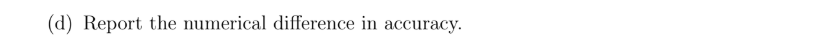

The numerical difference in accuracy between QDA and LDA was found to be 0%, indicating that both classifiers perform equally well for the Setosa vs Versicolor classification task.

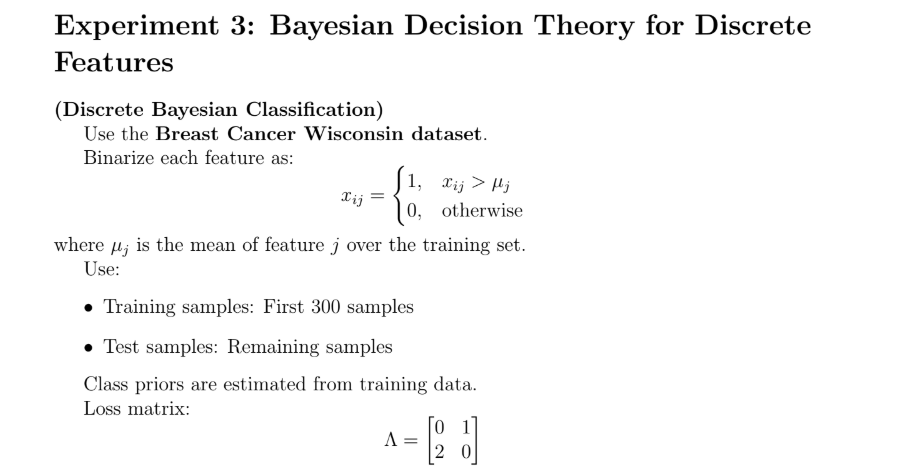

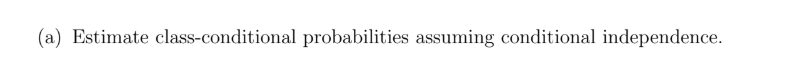

In [15]:
import numpy as np
from sklearn.datasets import load_breast_cancer

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Train-test split (constraint)
X_train = X[:300]
y_train = y[:300]
X_test  = X[300:]
y_test  = y[300:]

# Binarization threshold = training mean (feature-wise)
mu = np.mean(X_train, axis=0)

Xb_train = (X_train > mu).astype(int)
Xb_test  = (X_test > mu).astype(int)

# Estimate class priors
classes, counts = np.unique(y_train, return_counts=True)
priors = counts / counts.sum()

print("Class Priors:")
for c, p in zip(classes, priors):
    print(f"P(w={c}) = {p:.4f}")

# Estimate class-conditional probabilities P(x_j=1 | w_c)
P = {}

for c in classes:
    Xc = Xb_train[y_train == c]
    P[c] = np.mean(Xc, axis=0)

print("\nEstimated conditional probabilities for first 5 features:")
for c in classes:
    print(f"Class {c}:", P[c][:5])


Class Priors:
P(w=0) = 0.4867
P(w=1) = 0.5133

Estimated conditional probabilities for first 5 features:
Class 0: [0.7739726  0.73287671 0.78767123 0.71232877 0.60958904]
Class 1: [0.07792208 0.25324675 0.09090909 0.05194805 0.35064935]


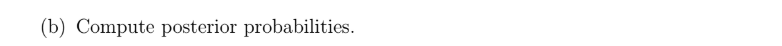

In [16]:
# Compute posterior probabilities using Naive Bayes (log-domain)

def log_posterior(x, c):
    log_prob = np.log(priors[c])
    for j in range(len(x)):
        if x[j] == 1:
            log_prob += np.log(P[c][j] + 1e-9)
        else:
            log_prob += np.log(1 - P[c][j] + 1e-9)
    return log_prob

# Compute posterior scores for test samples
log_posteriors = np.zeros((Xb_test.shape[0], len(classes)))

for i, x in enumerate(Xb_test):
    for c in classes:
        log_posteriors[i, c] = log_posterior(x, c)

print("Log-posterior of first test sample:")
print(log_posteriors[0])


Log-posterior of first test sample:
[-14.99376205 -57.17562582]


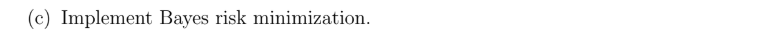

In [17]:
# Loss matrix (given)
Lambda = np.array([[0, 1],
                   [2, 0]])

# Bayes risk decision rule
y_pred = []

for i in range(len(Xb_test)):
    risks = []
    for a in classes:  # action
        risk = 0
        for c in classes:
            posterior = np.exp(log_posteriors[i, c])
            risk += Lambda[a, c] * posterior
        risks.append(risk)
    y_pred.append(np.argmin(risks))

y_pred = np.array(y_pred)

print("First 10 predicted labels:")
print(y_pred[:10])


First 10 predicted labels:
[0 1 0 1 1 1 1 1 1 1]


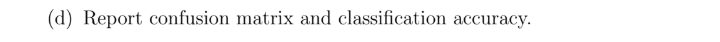

Confusion Matrix:
[[ 65   1]
 [ 15 188]]

Classification Accuracy = 94.05%


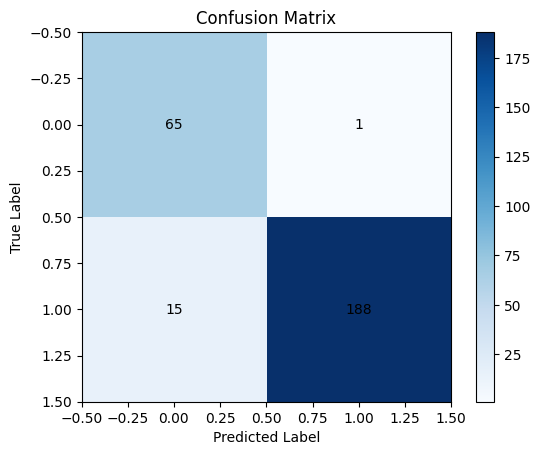

In [18]:
import matplotlib.pyplot as plt

# Confusion matrix
confusion = np.zeros((2, 2), dtype=int)
for t, p in zip(y_test, y_pred):
    confusion[t, p] += 1

# Accuracy
accuracy = np.trace(confusion) / np.sum(confusion)

print("Confusion Matrix:")
print(confusion)
print(f"\nClassification Accuracy = {accuracy*100:.2f}%")

# Plot confusion matrix
plt.imshow(confusion, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.colorbar()

for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion[i, j], ha="center", va="center", color="black")

plt.show()


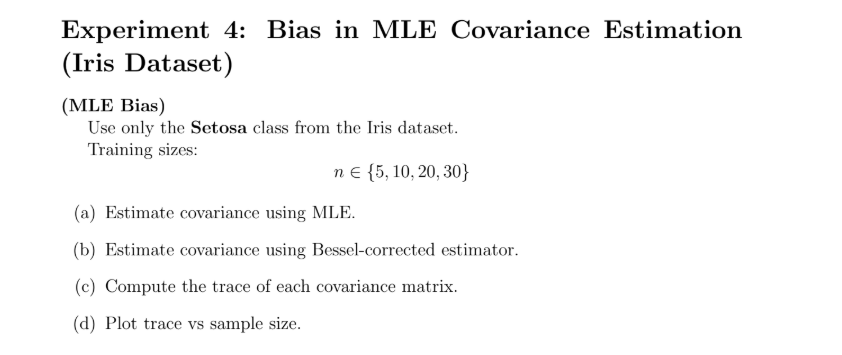

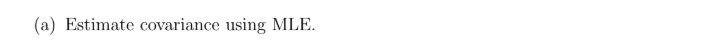

In [19]:
import numpy as np
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Use only Setosa class (first 50 samples)
X_setosa = X[y == 0]

sample_sizes = [5, 10, 20, 30]
cov_mle = {}

for n in sample_sizes:
    Xn = X_setosa[:n]
    mu = np.mean(Xn, axis=0)

    Sigma = np.zeros((Xn.shape[1], Xn.shape[1]))
    for x in Xn:
        d = (x - mu).reshape(-1, 1)
        Sigma += d @ d.T
    Sigma /= n   # MLE denominator

    cov_mle[n] = Sigma
    print(f"\nMLE Covariance (n={n}):")
    print(Sigma)



MLE Covariance (n=5):
[[ 0.0344  0.0292 -0.002   0.    ]
 [ 0.0292  0.0536 -0.002   0.    ]
 [-0.002  -0.002   0.004   0.    ]
 [ 0.      0.      0.      0.    ]]

MLE Covariance (n=10):
[[0.0764 0.0634 0.017  0.0078]
 [0.0634 0.0849 0.0155 0.0148]
 [0.017  0.0155 0.0105 0.004 ]
 [0.0078 0.0148 0.004  0.0056]]

MLE Covariance (n=20):
[[0.173275 0.1447   0.018775 0.021275]
 [0.1447   0.1576   0.0147   0.0272  ]
 [0.018775 0.0147   0.020275 0.004775]
 [0.021275 0.0272   0.004775 0.008275]]

MLE Covariance (n=30):
[[0.13395556 0.09766667 0.01737778 0.01542222]
 [0.09766667 0.1185     0.00166667 0.01866667]
 [0.01737778 0.00166667 0.03328889 0.00557778]
 [0.01542222 0.01866667 0.00557778 0.00982222]]


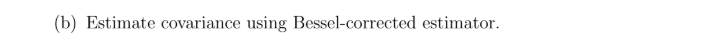

In [20]:
cov_unbiased = {}

for n in sample_sizes:
    Xn = X_setosa[:n]
    mu = np.mean(Xn, axis=0)

    Sigma = np.zeros((Xn.shape[1], Xn.shape[1]))
    for x in Xn:
        d = (x - mu).reshape(-1, 1)
        Sigma += d @ d.T
    Sigma /= (n - 1)   # Bessel correction

    cov_unbiased[n] = Sigma
    print(f"\nUnbiased Covariance (n={n}):")
    print(Sigma)



Unbiased Covariance (n=5):
[[ 0.043   0.0365 -0.0025  0.    ]
 [ 0.0365  0.067  -0.0025  0.    ]
 [-0.0025 -0.0025  0.005   0.    ]
 [ 0.      0.      0.      0.    ]]

Unbiased Covariance (n=10):
[[0.08488889 0.07044444 0.01888889 0.00866667]
 [0.07044444 0.09433333 0.01722222 0.01644444]
 [0.01888889 0.01722222 0.01166667 0.00444444]
 [0.00866667 0.01644444 0.00444444 0.00622222]]

Unbiased Covariance (n=20):
[[0.18239474 0.15231579 0.01976316 0.02239474]
 [0.15231579 0.16589474 0.01547368 0.02863158]
 [0.01976316 0.01547368 0.02134211 0.00502632]
 [0.02239474 0.02863158 0.00502632 0.00871053]]

Unbiased Covariance (n=30):
[[0.13857471 0.10103448 0.01797701 0.01595402]
 [0.10103448 0.12258621 0.00172414 0.01931034]
 [0.01797701 0.00172414 0.03443678 0.00577011]
 [0.01595402 0.01931034 0.00577011 0.01016092]]


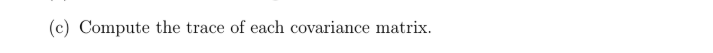

In [21]:
trace_mle = {}
trace_unbiased = {}

print("Trace of covariance matrices:\n")

for n in sample_sizes:
    trace_mle[n] = np.trace(cov_mle[n])
    trace_unbiased[n] = np.trace(cov_unbiased[n])

    print(f"n = {n}")
    print(f"  Trace (MLE)      = {trace_mle[n]:.4f}")
    print(f"  Trace (Unbiased) = {trace_unbiased[n]:.4f}")


Trace of covariance matrices:

n = 5
  Trace (MLE)      = 0.0920
  Trace (Unbiased) = 0.1150
n = 10
  Trace (MLE)      = 0.1774
  Trace (Unbiased) = 0.1971
n = 20
  Trace (MLE)      = 0.3594
  Trace (Unbiased) = 0.3783
n = 30
  Trace (MLE)      = 0.2956
  Trace (Unbiased) = 0.3058


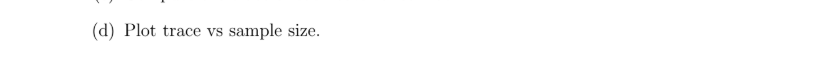

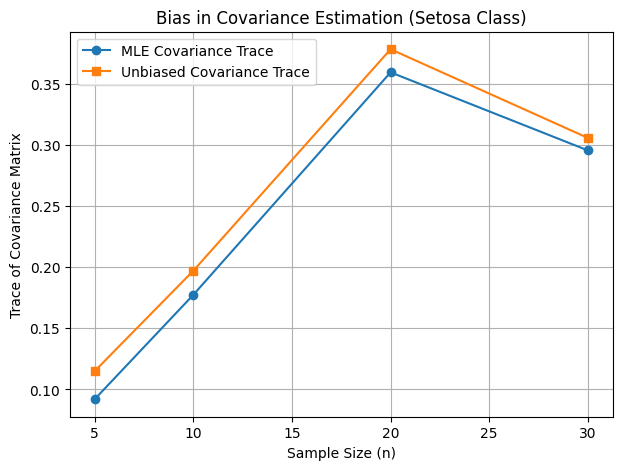

In [22]:
import matplotlib.pyplot as plt

n_vals = sample_sizes
mle_vals = [trace_mle[n] for n in n_vals]
unbiased_vals = [trace_unbiased[n] for n in n_vals]

plt.figure(figsize=(7,5))
plt.plot(n_vals, mle_vals, marker='o', label='MLE Covariance Trace')
plt.plot(n_vals, unbiased_vals, marker='s', label='Unbiased Covariance Trace')
plt.xlabel("Sample Size (n)")
plt.ylabel("Trace of Covariance Matrix")
plt.title("Bias in Covariance Estimation (Setosa Class)")
plt.legend()
plt.grid(True)
plt.show()


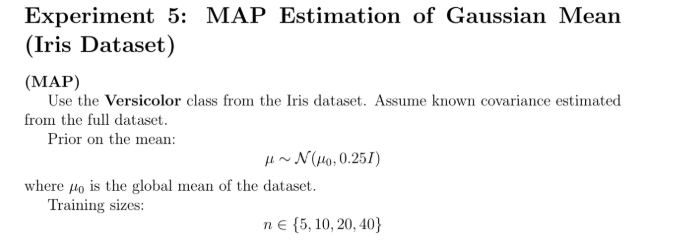

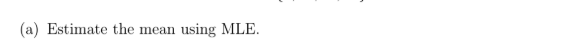

In [23]:
import numpy as np
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Use Versicolor class only (label = 1)
X_versicolor = X[y == 1]

# Training sizes
sample_sizes = [5, 10, 20, 40]

# MLE mean estimates
mu_mle = {}

for n in sample_sizes:
    Xn = X_versicolor[:n]   # no shuffling
    mu_mle[n] = np.mean(Xn, axis=0)
    print(f"MLE Mean (n={n}):\n{mu_mle[n]}\n")


MLE Mean (n=5):
[6.46 2.92 4.54 1.44]

MLE Mean (n=10):
[6.1  2.87 4.37 1.38]

MLE Mean (n=20):
[5.975 2.76  4.255 1.325]

MLE Mean (n=40):
[6.01   2.78   4.3175 1.35  ]



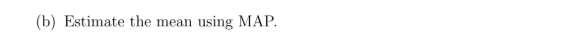

In [24]:
# Known covariance estimated from full Versicolor dataset
mu_full = np.mean(X_versicolor, axis=0)
Sigma = np.cov(X_versicolor.T, bias=True)

# Prior parameters
mu0 = np.mean(X, axis=0)          # global mean of full dataset
Sigma0 = 0.25 * np.eye(X.shape[1])  # prior covariance

inv_Sigma = np.linalg.inv(Sigma)
inv_Sigma0 = np.linalg.inv(Sigma0)

mu_map = {}

for n in sample_sizes:
    Xn = X_versicolor[:n]
    xbar = np.mean(Xn, axis=0)

    Sigma_post = np.linalg.inv(inv_Sigma0 + n * inv_Sigma)
    mu_post = Sigma_post @ (inv_Sigma0 @ mu0 + n * inv_Sigma @ xbar)

    mu_map[n] = mu_post
    print(f"MAP Mean (n={n}):\n{mu_map[n]}\n")


MAP Mean (n=5):
[6.28471443 2.85991429 4.37242675 1.38613411]

MAP Mean (n=10):
[6.0429457  2.85081598 4.30997706 1.36068019]

MAP Mean (n=20):
[5.95581806 2.75528499 4.23357095 1.31848234]

MAP Mean (n=40):
[5.99772421 2.77640685 4.30414032 1.34581649]



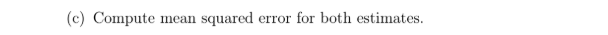

In [25]:
# True mean (reference)
mu_true = np.mean(X_versicolor, axis=0)

mse_mle = {}
mse_map = {}

print("Mean Squared Errors:\n")

for n in sample_sizes:
    mse_mle[n] = np.mean((mu_mle[n] - mu_true)**2)
    mse_map[n] = np.mean((mu_map[n] - mu_true)**2)

    print(f"n = {n}")
    print(f"  MSE (MLE) = {mse_mle[n]:.6f}")
    print(f"  MSE (MAP) = {mse_map[n]:.6f}\n")


Mean Squared Errors:

n = 5
  MSE (MLE) = 0.097118
  MSE (MAP) = 0.036486

n = 10
  MSE (MLE) = 0.012978
  MSE (MAP) = 0.005417

n = 20
  MSE (MLE) = 0.000412
  MSE (MAP) = 0.000341

n = 40
  MSE (MLE) = 0.002365
  MSE (MAP) = 0.001548



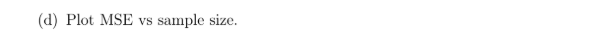

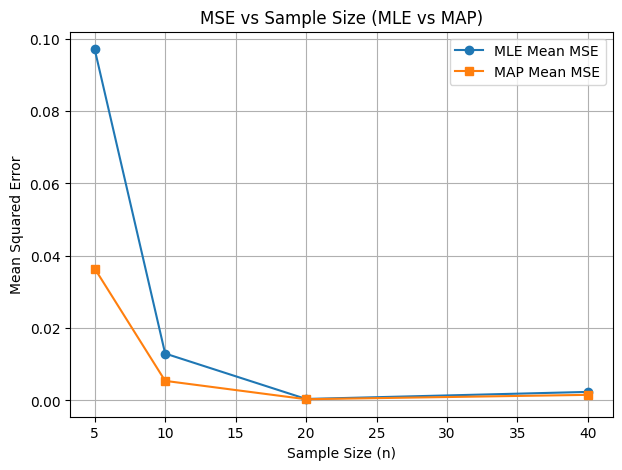

In [26]:
import matplotlib.pyplot as plt

n_vals = sample_sizes
mle_vals = [mse_mle[n] for n in n_vals]
map_vals = [mse_map[n] for n in n_vals]

plt.figure(figsize=(7,5))
plt.plot(n_vals, mle_vals, marker='o', label='MLE Mean MSE')
plt.plot(n_vals, map_vals, marker='s', label='MAP Mean MSE')
plt.xlabel("Sample Size (n)")
plt.ylabel("Mean Squared Error")
plt.title("MSE vs Sample Size (MLE vs MAP)")
plt.legend()
plt.grid(True)
plt.show()
